In [97]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


Veri seti dosya yolunun tanımlanması ve boyutunun öğrenilmesi

In [98]:
# Veri seti dosyasının yolunu tanımla
file_path = '/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv'

# Veri seti dosyasının boyutunu MB cinsinden öğrenmek için
file_size_mb = os.path.getsize(file_path) / (1024 * 1024)
print(f"Veri seti boyutu: {file_size_mb:.2f} MB")


Veri seti boyutu: 227.74 MB


In [99]:
# Veri setini CSV dosyasından oku
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [100]:
# Veri setinden rastgele 20.000 satır örnekle ve df_sampled'a kaydet
df_sampled = df.sample(n=20000, random_state=1)


In [101]:
# Örneklenen veri setinin ilk 5 satırını görüntüle
df_sampled.head()


,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
120640,0,1833282794,Sun May 17 22:48:54 PDT 2009,NO_QUERY,kiranerdcore,i have to write a speech on &quot;speeches&quo...
189703,0,1969194686,Fri May 29 23:17:33 PDT 2009,NO_QUERY,rock_sister,"Yeah, this is just great, sick in the middle o..."
1595284,4,2192335895,Tue Jun 16 06:52:57 PDT 2009,NO_QUERY,murz13,"anyway, gotta go.. CSI: NY up next and I have ..."
1021096,4,1882504707,Fri May 22 06:59:42 PDT 2009,NO_QUERY,bredo,@skimhannahkeys @AliciaSkimbit i like your app...
98291,0,1793245629,Thu May 14 01:56:46 PDT 2009,NO_QUERY,IncredibleLAGO,@Lolene ummmmm.... U disappeared... So much fo...


In [102]:
# veri setinin temel bilgilerini gösterir
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 120640 to 1103044
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                               --------------  ----- 
 0   0                                                                                                                    20000 non-null  int64 
 1   1467810369                                                                                                           20000 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         20000 non-null  object
 3   NO_QUERY                                                                                                             20000 non-null  object
 4   _TheSpecialOne_

In [103]:
df_sampled.isna().sum()  # df_sampled veri çerçevesindeki her bir sütunda eksik (NaN) olan değerlerin toplamını hesaplar


0                                                                                                                      0
1467810369                                                                                                             0
Mon Apr 06 22:19:45 PDT 2009                                                                                           0
NO_QUERY                                                                                                               0
_TheSpecialOne_                                                                                                        0
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D    0
dtype: int64

- df_sampled.duplicated() fonksiyonu, her satırın yinelenip yinelenmediğini belirten bir boolean Seri döndürür.
- .sum() fonksiyonu ise bu yinelenen satırların toplam sayısını hesaplar.


In [104]:
df_sampled.duplicated().sum()  # df_sampled veri çerçevesinde yinelenen (tekrarlanan) satırları kontrol eder ve bunların toplam sayısını döndürür


0

- Sütun adları daha okunabilir olacak şekilde güncellenmiştir.


In [105]:
df_sampled.columns = ['sentiment', 'ids', 'date', 'flag', 'user', 'tweets']  # sütun adlarını daha okunabilir hale getirmek için güncelledik
print(df_sampled.head())


         sentiment         ids                          date      flag  \
120640           0  1833282794  Sun May 17 22:48:54 PDT 2009  NO_QUERY   
189703           0  1969194686  Fri May 29 23:17:33 PDT 2009  NO_QUERY   
1595284          4  2192335895  Tue Jun 16 06:52:57 PDT 2009  NO_QUERY   
1021096          4  1882504707  Fri May 22 06:59:42 PDT 2009  NO_QUERY   
98291            0  1793245629  Thu May 14 01:56:46 PDT 2009  NO_QUERY   

                   user                                             tweets  
120640     kiranerdcore  i have to write a speech on &quot;speeches&quo...  
189703      rock_sister  Yeah, this is just great, sick in the middle o...  
1595284          murz13  anyway, gotta go.. CSI: NY up next and I have ...  
1021096           bredo  @skimhannahkeys @AliciaSkimbit i like your app...  
98291    IncredibleLAGO  @Lolene ummmmm.... U disappeared... So much fo...  


In [106]:
df_filtered = df_sampled[['sentiment', 'tweets']]  # Yalnızca 'sentiment' ve 'tweets' sütunlarını içeren yeni bir DataFrame oluşturur


Yalnızca sentiment ve tweets sütunlarını seçerek yeni bir df_filtered DataFrame'i oluşturulur.


In [107]:
print(df_filtered.head())


         sentiment                                             tweets
120640           0  i have to write a speech on &quot;speeches&quo...
189703           0  Yeah, this is just great, sick in the middle o...
1595284          4  anyway, gotta go.. CSI: NY up next and I have ...
1021096          4  @skimhannahkeys @AliciaSkimbit i like your app...
98291            0  @Lolene ummmmm.... U disappeared... So much fo...


## Veri Ön İşleme (Data Preprocessing)

Veri ön işleme adımları; veri setini temizleme, verileri normalize etme ve veri setini eğitim/test olarak ayırma işlemlerini kapsar. 
Bu süreç, verilerin etkili analiz ve modelleme için hazır hale getirilmesini sağlar.

### Küçük Harfe Dönüştürme (Convert to Lower Case)
Tweet metinlerindeki tüm karakterler küçük harfe dönüştürülerek metinler standart hale getirilir.


In [108]:
# Küçük harfe dönüştürme
df_filtered.loc[:, 'tweets'] = df_filtered['tweets'].str.lower()
df_filtered.head(5)

,sentiment,tweets
120640,0,i have to write a speech on &quot;speeches&quo...
189703,0,"yeah, this is just great, sick in the middle o..."
1595284,4,"anyway, gotta go.. csi: ny up next and i have ..."
1021096,4,@skimhannahkeys @aliciaskimbit i like your app...
98291,0,@lolene ummmmm.... u disappeared... so much fo...


### @ Mention ve Linkleri Temizleme

Tweet metinlerinden kullanıcı adlarını (örn. @kullanici) ve linkleri (http/https, www) temizleyerek verileri analiz için daha uygun hale getiriyoruz.


In [109]:
# @ kullanıcı adlarını kaldırma
df_filtered.loc[:, 'tweets'] = df_filtered['tweets'].replace(r'@[A-Za-z0-9]+', '', regex=True)

# Linkleri kaldırma
df_filtered.loc[:, 'tweets'] = df_filtered['tweets'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

# Kontrol: Hala link içeren satır var mı?
found = df_filtered[df_filtered['tweets'].str.contains("http")]
found.count()

sentiment    0
tweets       0
dtype: int64

### Noktalama İşaretleri ve Rakamları Temizleme

Tweet metinlerindeki sayıları ve noktalama işaretlerini kaldırarak metni sadeleştiriyoruz.


In [110]:
import string
import re

# Sayıları kaldır
texts = df_filtered['tweets'].copy()
new_text = [re.sub(r'\d+', '', text) for text in texts]
df_filtered.loc[:, 'tweets'] = new_text

In [111]:
# Noktalama işaretlerini kaldır
table = str.maketrans('', '', string.punctuation)
texts = df_filtered['tweets'].copy()
new_text = [' '.join(w.translate(table) for w in text.split()) for text in texts]
df_filtered.loc[:, 'tweets'] = new_text


In [112]:
df_filtered.head(5)

,sentiment,tweets
120640,0,i have to write a speech on quotspeechesquot w...
189703,0,yeah this is just great sick in the middle of ...
1595284,4,anyway gotta go csi ny up next and i have asia...
1021096,4,i like your approach to get the twitter power ...
98291,0,ummmmm u disappeared so much for nite out


In [113]:
# Metin arama ve manipülasyon işlemleri için gerekli kütüphaneler
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

**NLTK (Natural Language Toolkit)**: Python'da metin işleme için yaygın olarak kullanılan bir kütüphanedir.

- `nltk.download('stopwords')`: İngilizce'de sık geçen ve genellikle analizde önemsiz olan kelimeler listesini indirir. (örn. "the", "is", "and")
- `nltk.download('punkt')`: Metinleri cümlelere ve kelimelere bölebilmek için gerekli modeli indirir.
- `nltk.download('wordnet')`: Kelimeler arası anlam ilişkileri veritabanını indirir; lemmatizasyon işlemi için gereklidir.


In [114]:
# Gerekli NLTK verilerinin indirilmesi
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng') 

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

### Tokenization (Tokenleştirme)

Tweet metinleri kelime listelerine ayrıştırılmıştır (tokenization).


In [115]:
# Tweetleri kelime bazında tokenize etme 
df_filtered.loc[:, 'words'] = df_filtered['tweets'].apply(word_tokenize)

print(df_filtered[['tweets', 'words']].head())


                                                    tweets  \
120640   i have to write a speech on quotspeechesquot w...   
189703   yeah this is just great sick in the middle of ...   
1595284  anyway gotta go csi ny up next and i have asia...   
1021096  i like your approach to get the twitter power ...   
98291            ummmmm u disappeared so much for nite out   

                                                     words  
120640   [i, have, to, write, a, speech, on, quotspeech...  
189703   [yeah, this, is, just, great, sick, in, the, m...  
1595284  [anyway, got, ta, go, csi, ny, up, next, and, ...  
1021096  [i, like, your, approach, to, get, the, twitte...  
98291    [ummmmm, u, disappeared, so, much, for, nite, ...  


/tmp/ipykernel_35/2452309283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'words'] = df_filtered['tweets'].apply(word_tokenize)


### Stopwords Temizliği

Tweetlerden anlamsız ve sık geçen kelimeler (stopwords) çıkarıldı.


In [116]:
# Stopwords listesi oluşturma
stop_words = set(stopwords.words('english'))

# Stopwords temizliği
df_filtered.loc[:, 'words_cleaned'] = df_filtered['words'].apply(lambda words: [word for word in words if word.lower() not in stop_words])

print(df_filtered[['tweets', 'words', 'words_cleaned']].head())


                                                    tweets  \
120640   i have to write a speech on quotspeechesquot w...   
189703   yeah this is just great sick in the middle of ...   
1595284  anyway gotta go csi ny up next and i have asia...   
1021096  i like your approach to get the twitter power ...   
98291            ummmmm u disappeared so much for nite out   

                                                     words  \
120640   [i, have, to, write, a, speech, on, quotspeech...   
189703   [yeah, this, is, just, great, sick, in, the, m...   
1595284  [anyway, got, ta, go, csi, ny, up, next, and, ...   
1021096  [i, like, your, approach, to, get, the, twitte...   
98291    [ummmmm, u, disappeared, so, much, for, nite, ...   

                                             words_cleaned  
120640   [write, speech, quotspeechesquot, wtf, thanks,...  
189703   [yeah, great, sick, middle, night, cant, sleep...  
1595284  [anyway, got, ta, go, csi, ny, next, asia, mem...  
1021096  [

/tmp/ipykernel_35/2247255979.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'words_cleaned'] = df_filtered['words'].apply(lambda words: [word for word in words if word.lower() not in stop_words])


In [117]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import wordnet

# Lemmatizer nesnesi oluşturuluyor
lemmatizer = WordNetLemmatizer()

# Kelimenin türüne göre (isim, fiil, sıfat, zarf) uygun etiket döndüren fonksiyon
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        "J": wordnet.ADJ,
        "N": wordnet.NOUN,
        "V": wordnet.VERB,
        "R": wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

# Lemmatizasyon işlemi (uyarısız)
df_filtered['words_lemmatized'] = df_filtered['words_cleaned'].apply(
    lambda words: [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]
)

print(df_filtered[['words_cleaned', 'words_lemmatized']].head(10))


                                             words_cleaned  \
120640   [write, speech, quotspeechesquot, wtf, thanks,...   
189703   [yeah, great, sick, middle, night, cant, sleep...   
1595284  [anyway, got, ta, go, csi, ny, next, asia, mem...   
1021096  [like, approach, get, twitter, power, promote,...   
98291                 [ummmmm, u, disappeared, much, nite]   
755196   [swear, dont, go, coldstone, soon, start, crying]   
925330   [church, mommys, soccer, game, amp, family, di...   
1517423  [iremember, ehh, last, month, im, little, mont...   
1462903  [thinks, time, twitter, worked, haha, got, exa...   
716696                 [shit, think, tweeted, twice, srry]   

                                          words_lemmatized  
120640   [write, speech, quotspeechesquot, wtf, thanks,...  
189703   [yeah, great, sick, middle, night, cant, sleep...  
1595284  [anyway, get, ta, go, csi, ny, next, asia, mem...  
1021096  [like, approach, get, twitter, power, promote,...  
98291       

/tmp/ipykernel_35/3866816056.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['words_lemmatized'] = df_filtered['words_cleaned'].apply(


There are changes like:
- worked → work
- got → get
- thinks → think


### Fazladan Boşlukları Kaldırma (Remove Extra Space)

Lemmatize edilmiş kelimeleri tekrar birleştirip gereksiz boşluklardan arındırıyoruz.


In [118]:
# Fazladan boşlukları kaldır
df_filtered['processed_tweets'] = df_filtered['words_lemmatized'].apply(lambda words: ' '.join(words).strip())

print(df_filtered[['processed_tweets']].head())


                                          processed_tweets
120640        write speech quotspeechesquot wtf thanks raz
189703   yeah great sick middle night cant sleepand gon...
1595284  anyway get ta go csi ny next asia memorize tyl...
1021096  like approach get twitter power promote goodly...
98291                         ummmmm u disappear much nite


### Nadir (Tekil) Kelimeleri Temizleme (Remove Rare Words)

Veri setinde yalnızca bir kez geçen nadir kelimeler çıkarılır.


In [119]:
from collections import Counter

# Tüm kelimeleri tek bir listede toplama
all_words = ' '.join(df_filtered['processed_tweets']).split()
word_freq = pd.Series(all_words).value_counts()

# Sadece bir kez geçen kelimelerin listesi
less_frequent = word_freq[word_freq == 1].index

# Nadir kelimeleri kaldırma
df_filtered['processed_tweets'] = df_filtered['processed_tweets'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in less_frequent)
)

print(df_filtered[['tweets', 'processed_tweets']].head())


                                                    tweets  \
120640   i have to write a speech on quotspeechesquot w...   
189703   yeah this is just great sick in the middle of ...   
1595284  anyway gotta go csi ny up next and i have asia...   
1021096  i like your approach to get the twitter power ...   
98291            ummmmm u disappeared so much for nite out   

                                          processed_tweets  
120640                             write speech wtf thanks  
189703   yeah great sick middle night cant sleepand gon...  
1595284  anyway get ta go csi ny next asia memorize see...  
1021096  like approach get twitter power promote goodly...  
98291                         ummmmm u disappear much nite  


### Yinelenen Satırların Temizlenmesi (Remove Duplicated Rows)

Aynı tweet içeriğine sahip tekrar eden satırlar veri setinden çıkarılır.


In [120]:
# Yinelenen satırları bulma
duplicated_rows = df_filtered[df_filtered['processed_tweets'].duplicated()]
print(f"Duplicated rows: {duplicated_rows.shape[0]}")

Duplicated rows: 714


In [121]:
# Yinelenen satırları silme
df_filtered_unique = df_filtered.drop_duplicates(subset='processed_tweets')

print(f"Orijinal dataset boyutu: {df_filtered.shape[0]}")
print(f"Yinelenen satırlar temizlendikten sonraki boyut: {df_filtered_unique.shape[0]}")


Orijinal dataset boyutu: 20000
Yinelenen satırlar temizlendikten sonraki boyut: 19286


In [122]:
 # Güncellenmiş DataFrame'i atama
df_filtered = df_filtered_unique

### Hedef Değişkeninin Düzenlenmesi (Target Variable Adjustment)

Pozitif duyguları temsil eden 'sentiment' değeri 4 olanları, 1 olarak güncelliyoruz.


In [123]:
# 'sentiment' sütununda 4 olanları 1 ile değiştir
df_filtered['sentiment'] = df_filtered['sentiment'].replace(4, 1)

print(df_filtered['sentiment'].head())


120640     0
189703     0
1595284    1
1021096    1
98291      0
Name: sentiment, dtype: int64


### Metinlerin Sayısal Vektörlere Dönüştürülmesi

**TF-IDF (Term Frequency–Inverse Document Frequency)** dönüşümü, metin verisini sayısal formata çevirir. Bu sayede modeller, metni daha iyi anlayabilir ve daha etkili tahminler yapabilir.


In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vektörleştirici nesnesi oluşturma
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_filtered['processed_tweets'])

In [125]:
# Veri tipini kontrol etme
print(df_filtered['processed_tweets'].apply(type).value_counts())


processed_tweets
<class 'str'>    19286
Name: count, dtype: int64


## DATA VISUALIZATION

### Sentiment Distribution Analysis

Veri setindeki olumlu ve olumsuz duygu etiketlerinin dağılımı pasta grafiği ile görselleştirilir.


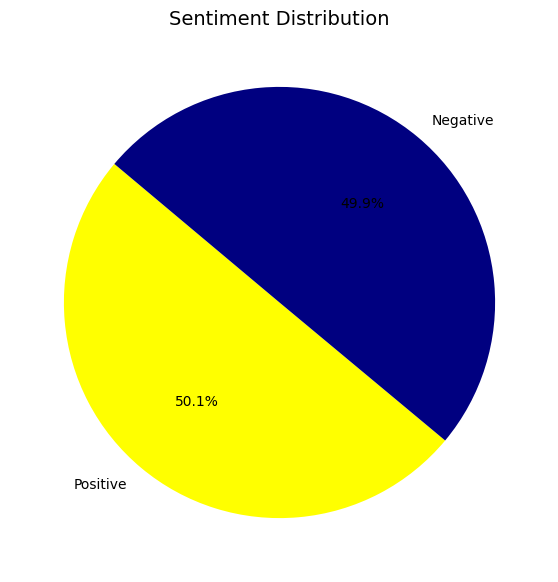

In [126]:
import matplotlib.pyplot as plt
# Duygu (sentiment) dağılımını say
sentiment_counts = df_filtered['sentiment'].value_counts()
# Etiket isimleri
labels = {
    0: 'Negative',
    1: 'Positive'
}

# Etiket listesi oluştur
custom_labels = [labels.get(x, str(x)) for x in sentiment_counts.index]

# Renkler
colors = ('yellow', 'navy')

# Pasta grafiği çiz
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=custom_labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Distribution", size=14)
plt.show()


The pie chart illustrates the distribution of sentiments in the dataset. The distribution is as follows:

- Positive Sentiments: 49.9%
- Negative Sentiments: 50.1%

This near-even split between positive and negative sentiments indicates a balanced representation of opinions within the dataset.

### Most Frequent Positive and Negative Words Cloud


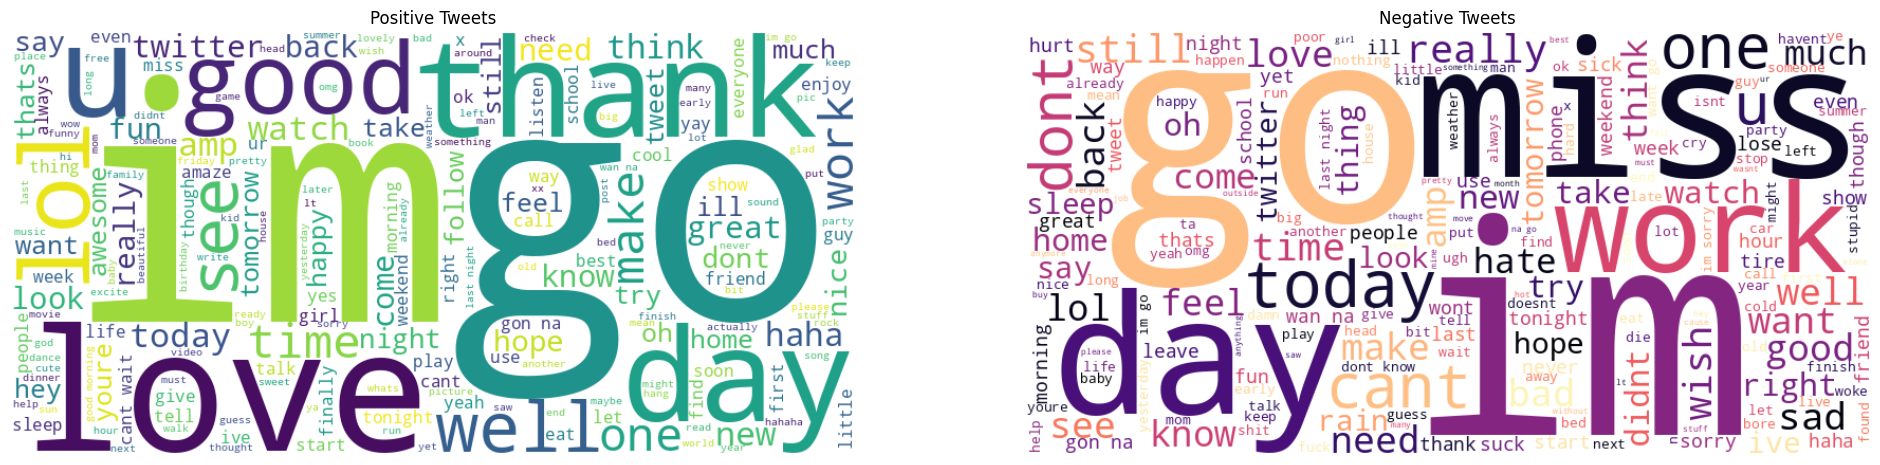

In [127]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# WordCloud fonksiyonu
def plot_wordclouds(positive_text, negative_text):
    # Grafik boyutu ve subplotlar
    fig, axes = plt.subplots(1, 2, figsize=(24, 7))
    
    # Pozitif tweetler için wordcloud
    wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(positive_text)
    axes[0].imshow(wordcloud_positive, interpolation='bilinear')
    axes[0].set_title('Positive Tweets')
    axes[0].axis('off')
    
    # Negatif tweetler için wordcloud
    wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(negative_text)
    axes[1].imshow(wordcloud_negative, interpolation='bilinear')
    axes[1].set_title('Negative Tweets')
    axes[1].axis('off')
    
    # Alt grafikler arası boşluk
    plt.subplots_adjust(wspace=0.2)
    plt.show()

# Pozitif ve negatif tweetlerden metin oluşturma
positive_text = ' '.join(df_filtered[df_filtered['sentiment'] == 1]['processed_tweets'].astype(str))
negative_text = ' '.join(df_filtered[df_filtered['sentiment'] == 0]['processed_tweets'].astype(str))

plot_wordclouds(positive_text, negative_text)


The word clouds below visualize the most frequent words found in positive and negative tweets within the dataset.

- **Positive Tweets:**  
  The most prominent words in positive tweets are: `love`, `go`, `im`, `thank`, `good`, `day`, `lol`, `work`, `make`, `time`, `see`, `think`, `today`, `hope`, `well`, `great`, `night`, `play`, `twitter`, `back`, `fun`, `look`, `happy`, `awesome`, `yay`, `friend`.

- **Negative Tweets:**  
  The most prominent words in negative tweets are: `im`, `go`, `work`, `miss`, `day`, `today`, `cant`, `time`, `wish`, `feel`, `well`, `dont`, `back`, `new`, `make`, `bad`, `sad`, `try`, `watch`, `ugh`, `didnt`, `one`, `guy`, `right`, `oh`, `hate`, `fail`, `lose`, `home`.

These word clouds provide a quick overview of the language used in tweets and highlight the differences in commonly used words between positive and negative sentiments.


### Duygu ve Tweet Uzunluğu Arasındaki İlişki

Bu analiz, tweetlerin duygusu (pozitif/negatif) ile tweet uzunlukları arasında bir ilişki olup olmadığını inceler.  
Aşağıdaki histogram, farklı duygu etiketleri için tweet uzunluğu dağılımını karşılaştırmaktadır.


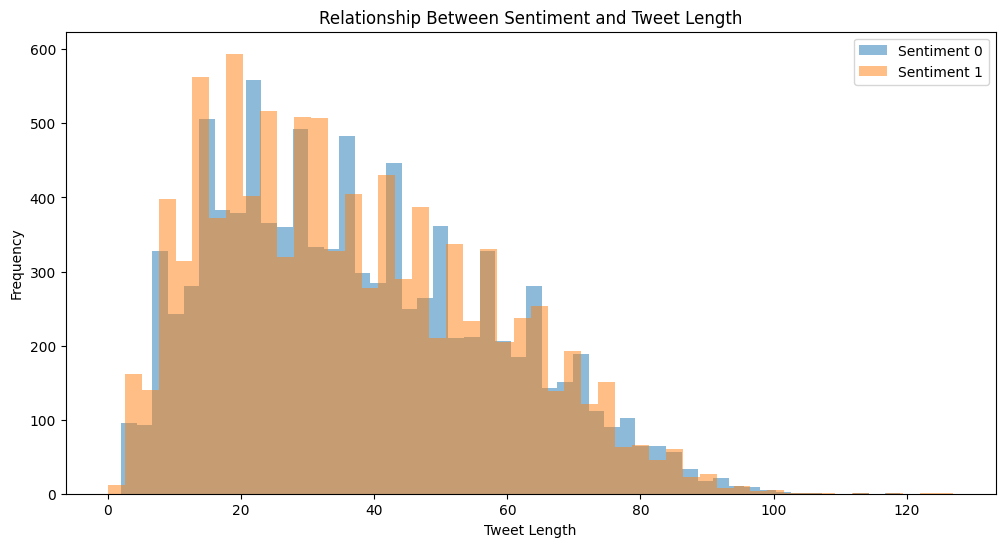

In [128]:
# Her tweetin uzunluğunu hesapla
df_filtered['text_length'] = df_filtered['processed_tweets'].apply(len)

plt.figure(figsize=(12, 6))
for sentiment in df_filtered['sentiment'].unique():
    subset = df_filtered[df_filtered['sentiment'] == sentiment]
    plt.hist(subset['text_length'], bins=50, alpha=0.5, label=f'Sentiment {sentiment}')

plt.title('Relationship Between Sentiment and Tweet Length')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Grafiğe göre, artan tweet uzunluğu hem pozitif hem de negatif tweet uzunluğunu etkiler. Tweet uzunluğu 0-80 arasındayken pozitif tweet frekansı 0-200 arasındadır. Özellikle kısa tweetlerde (kahverengi bölüm), daha fazla pozitiflik gözlemlenmiştir.

### Kullanıcı Bazında Duygu Dağılımı (Sentiment Distribution of Users)

Bu analiz, en fazla tweet atan kullanıcılar arasında pozitif ve negatif tweetlerin dağılımını inceler.


In [129]:
# Her kullanıcı için sentiment dağılımı
top_users = df_sampled['user'].value_counts().head(10).index
top_users_df = df_sampled[df_sampled['user'].isin(top_users)]

In [130]:
# Kullanıcı ve duygu etiketine göre dağılım
user_sentiment = top_users_df.groupby('user')['sentiment'].value_counts().unstack()


user_sentiment DataFrame'i, her bir kullanıcının pozitif ve negatif tweet sayısını gösterir.  
Bu tablo, kullanıcıların duygu analizi sonuçlarını daha iyi anlamak ve karşılaştırmak için kullanılabilir.


### En Popüler Kullanıcıların Duygu Dağılımı Görselleştirmesi

Aşağıdaki yığılmış çubuk grafik, en çok tweet atan kullanıcıların pozitif ve negatif tweet sayılarını göstermektedir.


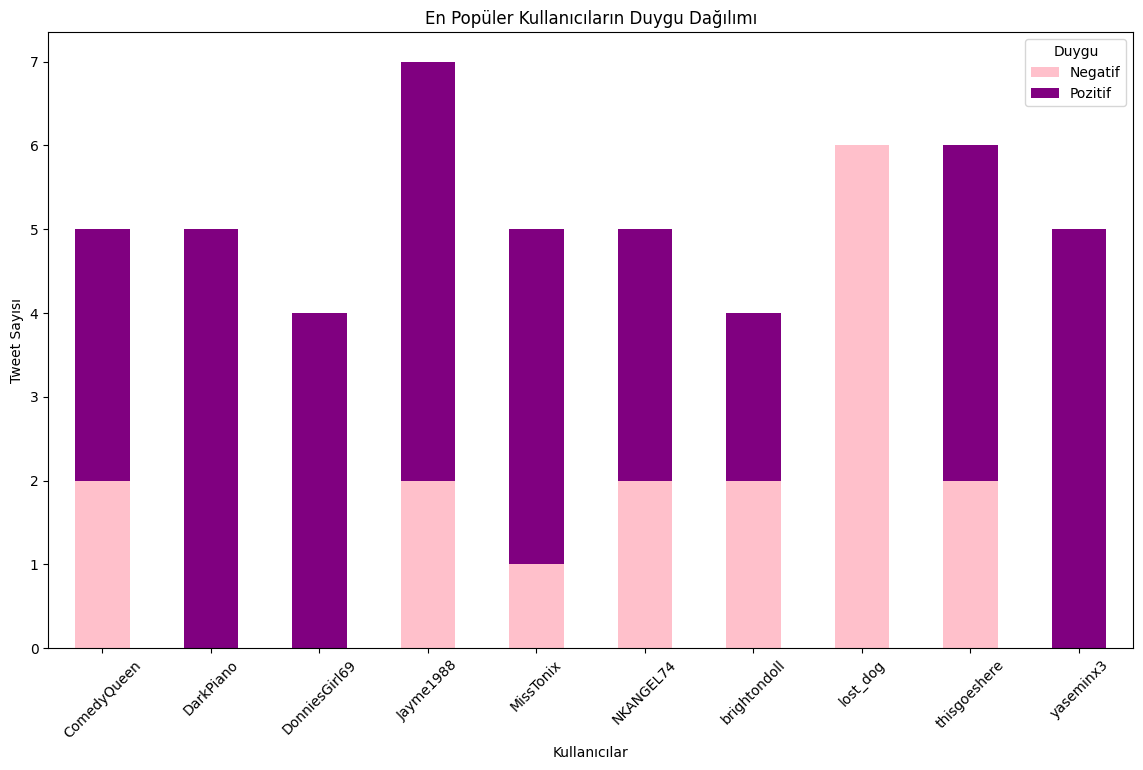

In [131]:
user_sentiment.plot(kind='bar', stacked=True, figsize=(14, 8), color=['pink', 'purple'])
plt.title('En Popüler Kullanıcıların Duygu Dağılımı')
plt.xlabel('Kullanıcılar')
plt.ylabel('Tweet Sayısı')
plt.legend(title='Duygu', labels=['Negatif', 'Pozitif'])
plt.xticks(rotation=45)
plt.show()

Grafiğe göre, en çok tweet atan ilk 10 kullanıcının tweetleri genellikle pozitif duygu içermektedir.

---

## AYKIRI DEĞER (OUTLIER)

Aykırı değerler, veri setinin genel dağılımından önemli ölçüde farklılaşan veri noktalarıdır. Bu değerler genellikle "normal" dağılımdan sapmaları gösterir ve veri analizi sırasında tespit edilip değerlendirilmelidir.


In [132]:
from scipy import stats

# Z-Score yöntemiyle aykırı değerlerin tespiti
z_scores = stats.zscore(df_filtered['text_length'])

# 3 standart sapmadan daha uzak olan değerler aykırı kabul edilir
outliers = df_filtered[abs(z_scores) > 3]
print(outliers)


         sentiment                                             tweets  \
1539424          1  in our family bed i said quotlets try to fall ...   
1198439          1  no matter how discouraged i get when im remind...   
92742            0  is back home amp feels badly that a nice day w...   
1466476          1  sun a bagel four advil amp two cups of coffee ...   
1153322          1  im trying harder coz ily more hbdandyhurley hb...   
646125           0  friday june  camps are rained out saturday jun...   
1387257          1  many external influences r spiralling outta my...   
388632           0  stupid fucken cruiser bottles wont open almost...   
1294568          1  mcflyforgermany mcflyforgermany mcflyforgerman...   
59246            0  idea for lossy text compression convert to ano...   
486908           0  street sweeper social club release new album t...   
1023228          1  is loving these new mikado snacks although the...   
1220986          1  mileymonday mileymonday mileymo

### Tweet Uzunlukları ve Aykırı Değerlerin Dağılımı

Aşağıdaki grafik, tweet uzunluklarının ve tespit edilen aykırı değerlerin dağılımını göstermektedir.


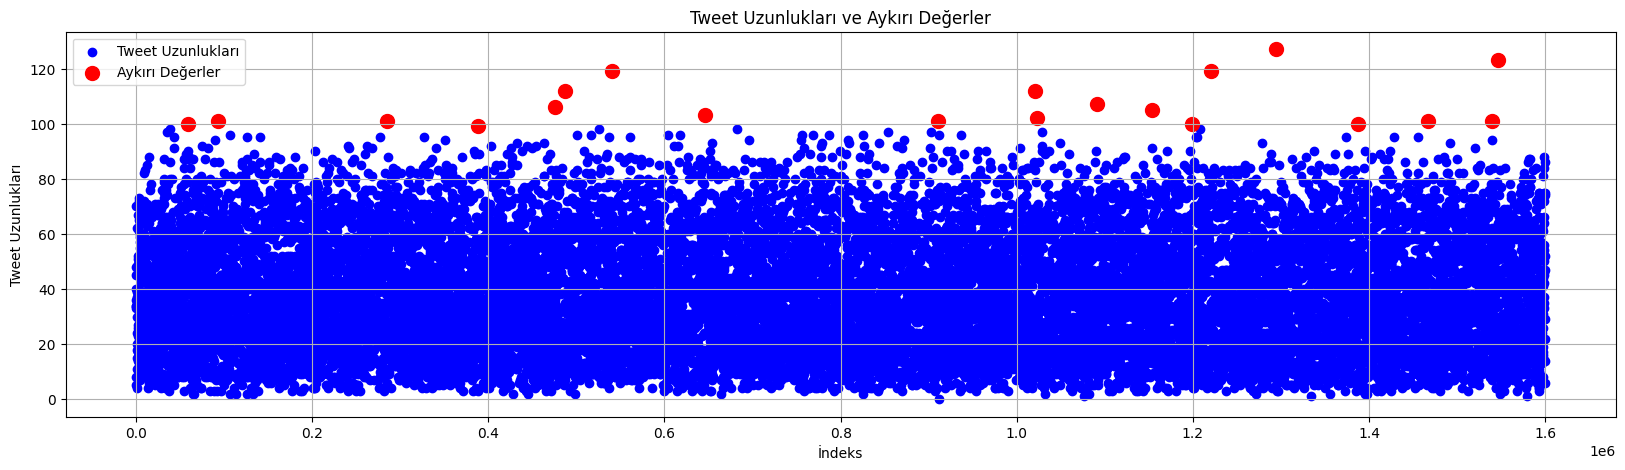

In [133]:
plt.figure(figsize=(20, 5))
plt.scatter(df_filtered.index, df_filtered['text_length'], color='blue', label='Tweet Uzunlukları')
plt.scatter(outliers.index, outliers['text_length'], color='red', label='Aykırı Değerler', marker='o', s=100)
plt.title('Tweet Uzunlukları ve Aykırı Değerler')
plt.xlabel('İndeks')
plt.ylabel('Tweet Uzunlukları')
plt.legend()
plt.grid(True)
plt.show()

- Çoğu tweetin uzunluğu 0 ile 100 karakter arasındadır ve sadece az sayıda tweet 100 karakterin üzerindedir. Bu durumda, 100 karakteri geçen tweetler aykırı değer olarak kabul edilir, ancak bu çok nadirdir. Bu, çoğu tweetin standart uzunluk aralığında olduğunu gösterir.
- Verinin çoğu ortalama etrafında toplanmıştır ve aykırı değerler nadirdir. Eğer tweet uzunlukları genellikle belli bir aralıkta toplanıyorsa ve bu aralığın dışında kalan veri sayısı azsa, veri dağılımı homojen kabul edilebilir.


## Algoritma Seçimi ve Hiperparametre Optimizasyonu



### Eğitim ve Test Setlerinin Ayrılması

Duygu etiketleri hedef değişken (y) olarak belirlenir.  
Veri seti %80 eğitim, %20 test olarak ayrılır.


In [134]:
# TF-IDF vektörleştirici nesnesi oluşturulup fit-transform işlemi
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_filtered['processed_tweets'])


Yukarıdaki **TFidfVectorizer** işlemi sonucunda, her tweet için sayısal özellikler elde edilir. Bu **özellikler**, modelin öğrenmesi gereken bağımsız değişkenlerdir. Bu nedenle, bu dönüşümden elde edilen vektörler matrisine X diyoruz.  
Başka bir deyişle, X her bir metnin TF-IDF özellik vektörlerini içerir.


In [135]:
from sklearn.model_selection import train_test_split
# Duygu etiketlerini hedef değişken olarak ata
y = df_filtered['sentiment']

# Eğitim ve test setlerini ayır (eğitim %80, test %20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (15428, 7075)
Test set size: (3858, 7075)


## Gözetimli Öğrenme Algoritmaları

Bu projede, farklı gözetimli öğrenme algoritmaları kullanılarak metin verisi üzerinde sınıflandırma/regresyon işlemleri gerçekleştirilmiştir. Kullanılan başlıca algoritmalar:

1. **Doğrusal Regresyon (Linear Regression):**
   - Sürekli değerleri tahmin etmek için kullanılır. Genellikle regresyon problemlerinde tercih edilir.
2. **Lojistik Regresyon (Logistic Regression):**
   - İkili veya çoklu sınıflandırma problemlerinde yaygın olarak kullanılır.
3. **Karar Ağaçları (Decision Trees):**
   - Hem sınıflandırma hem de regresyon problemleri için kullanılabilir, verinin karar noktalarını modellemede etkilidir.
4. **k-En Yakın Komşu (k-Nearest Neighbors - KNN) Sınıflandırıcısı:**
   - Sınıflandırma problemlerinde, gözleme en yakın k komşunun sınıfını tahmin eder.
5. **Destek Vektör Makineleri (Support Vector Machines - SVM):**
   - Sınıflandırma ve regresyon görevleri için güçlü bir algoritmadır, genellikle yüksek boyutlu verilerde tercih edilir.

Aşağıda, bu algoritmaların Python kodu ile tanımlanmış halleri yer almaktadır:


In [136]:
# Gerekli kütüphaneleri import et
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Algoritmaları sözlük şeklinde tanımla
classifiers = {
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "KNN Classifier": KNeighborsClassifier(),
    "Support Vector Classifier": SVC()
}


## Model Eğitimi ve Başarı Metriklerinin Çapraz Doğrulama ile Ölçülmesi

Aşağıdaki döngüde, seçilen tüm algoritmalar için:
- Model eğitimi
- Test kümesi üzerinde tahmin
- Doğruluk skoru, karışıklık matrisi, sınıflandırma raporu
- 10 katlı çapraz doğrulama ile başarı metrikleri (accuracy, precision, recall, f1)
hesaplanıp ekrana yazdırılır.


In [137]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_test_pred = classifier.predict(X_test)
    
    print(f"Model: {name.upper()}")
    if "Regression" in name and "Logistic" not in name:
        # Regresyon metrikleri
        mse = mean_squared_error(y_test, y_test_pred)
        mae = mean_absolute_error(y_test, y_test_pred)
        r2 = r2_score(y_test, y_test_pred)
        print(f"Mean Squared Error: {mse:.5f}")
        print(f"Mean Absolute Error: {mae:.5f}")
        print(f"R2 Score: {r2:.5f}")
    else:
        # Sınıflandırma metrikleri
        accuracy = accuracy_score(y_test, y_test_pred)
        conf_matrix = confusion_matrix(y_test, y_test_pred)
        class_report = classification_report(y_test, y_test_pred)
        scores = cross_validate(
            classifier, X_train, y_train,
            scoring=['accuracy', 'precision', 'recall', 'f1'],
            cv=10, return_train_score=False
        )
        scores_df = pd.DataFrame(scores)
        print(f"Accuracy Score: {accuracy:.5f}")
        print("Confusion Matrix:")
        print(conf_matrix)
        print("Classification Report:")
        print(class_report)
        print("Cross-Validation Scores (Average):")
        print(scores_df.mean().apply("{:.5f}".format))
    print("\n" + "#"*50 + "\n")


Model: LINEAR REGRESSION
Mean Squared Error: 0.43860
Mean Absolute Error: 0.48614
R2 Score: -0.75540

##################################################

Model: LOGISTIC REGRESSION
Accuracy Score: 0.75168
Confusion Matrix:
[[1388  495]
 [ 463 1512]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1883
           1       0.75      0.77      0.76      1975

    accuracy                           0.75      3858
   macro avg       0.75      0.75      0.75      3858
weighted avg       0.75      0.75      0.75      3858

Cross-Validation Scores (Average):
fit_time          0.35274
score_time        0.00895
test_accuracy     0.74216
test_precision    0.73428
test_recall       0.75596
test_f1           0.74486
dtype: object

##################################################

Model: DECISION TREE CLASSIFIER
Accuracy Score: 0.67652
Confusion Matrix:
[[1266  617]
 [ 631 1344]]
Classification Report:
              prec

## Model Seçimi ve Karşılaştırması

**Linear Regression**  
- Sadece regresyon çıktısı üretir; sınıflandırmada uygun değildir.  
- Ortalama Kare Hatası (MSE): 0.43860  
- Ortalama Mutlak Hata (MAE): 0.48614  
- R2 Skoru: -0.75540  

---

**Logistic Regression**  
- Doğruluk: %75.17  
- Eğitim süresi: Kısa (fit_time: 0.35 sn)  
- Yorumlanabilirlik: Yüksek  
- Sınıf 0 için precision %75, recall %74  
- Sınıf 1 için precision %75, recall %77  
- Dengeli ve güçlü bir sınıflandırma modeli, genel amaçlı uygulamalarda tercih edilir.  

---

**Decision Tree Classifier**  
- Doğruluk: %67.65  
- Eğitim süresi: Orta (fit_time: 2.42 sn)  
- Yorumlanabilirlik: Orta  
- Sınıf 0 için precision %67, recall %67  
- Sınıf 1 için precision %69, recall %68  
- Hızlı öğrenme, ancak overfitting riski mevcut.  

---

**KNN Classifier**  
- Doğruluk: %55.11  
- Eğitim süresi: Çok kısa fit_time (0.002 sn) ama score_time yüksek (0.92 sn) — test aşaması yavaş  
- Yorumlanabilirlik: Düşük  
- Sınıf 0 için precision %72, recall %13  
- Sınıf 1 için precision %53, recall %95  
- Dengesiz veri setlerinde düşük performans gösterebilir.  

---

**Support Vector Classifier (SVC)**  
- Doğruluk: %74.78  
- Eğitim süresi: Uzun (fit_time: 25.47 sn)  
- Yorumlanabilirlik: Düşük  
- Sınıf 0 için precision %75, recall %73  
- Sınıf 1 için precision %75, recall %77  
- Yüksek doğruluk, ancak daha fazla hesaplama gerektirir ve yorumlaması zordur.  

---

**Sonuç:**  
- **Lojistik Regresyon** ve **SVC** benzer yüksek doğruluk ve dengeli performans sergiliyor.  
- **Lojistik Regresyon**, yorumlanabilirliği ve düşük eğitim süresiyle tercih sebebi olabilir.  
- **Decision Tree** orta seviyede performans gösterirken, **KNN** bu veri setinde düşük başarı sağladı.  


## Hiperparametre Optimizasyonu (RandomizedSearchCV)

Aşağıdaki kodda, Logistic Regression için en iyi parametreler RandomizedSearchCV ile bulunmuştur.  
En iyi parametreler: {'solver': 'liblinear', 'max_iter': 1000, 'C': 0.615848211066026}

En iyi doğruluk skoru: 0.7447888907660903 yükselmiştir.



In [138]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.linear_model import LogisticRegression

# Hiperparametre aralıkları
param_distributions = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'saga'],
    'max_iter': [100,200,300, 500, 1000]
}

# Model nesnesi
model = LogisticRegression()

# RandomizedSearchCV nesnesi
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=100,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Modeli eğit
random_search.fit(X, y)

# Sonuçları yazdır
print("En iyi parametreler:", random_search.best_params_)
print("En iyi doğruluk skoru:", random_search.best_score_)
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

En iyi parametreler: {'solver': 'saga', 'max_iter': 300, 'C': 0.615848211066026}
En iyi doğruluk skoru: 0.7447888907660903


Doğruluk (Accuracy): 0.7512
Sınıflandırma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.75      0.73      0.74      1883
           1       0.75      0.77      0.76      1975

    accuracy                           0.75      3858
   macro avg       0.75      0.75      0.75      3858
weighted avg       0.75      0.75      0.75      3858



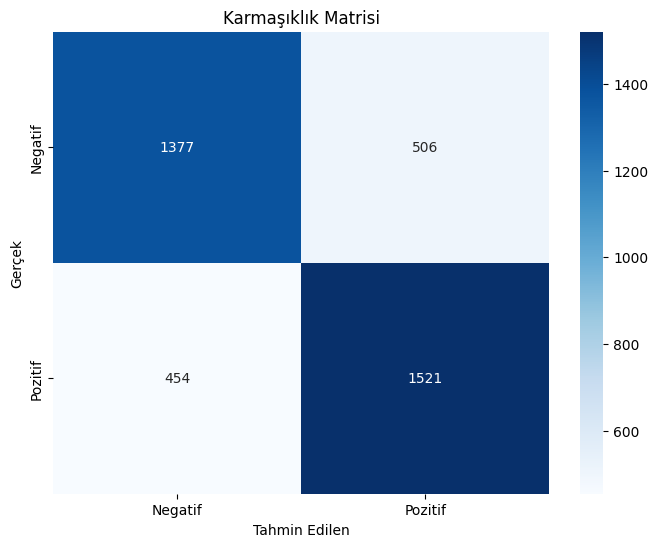

In [139]:
import seaborn as sns
# En iyi parametrelerle Lojistik Regresyon Modeli
model = LogisticRegression(solver='saga', max_iter=300, C=0.615848211066026)

# Modeli eğitim verisiyle eğit
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yap
y_pred = model.predict(X_test)

# Performans metrikleri
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Doğruluk (Accuracy): {accuracy:.4f}")
print("Sınıflandırma Raporu (Classification Report):\n", report)

# Karmaşıklık matrisinin görselleştirilmesi
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negatif', 'Pozitif'],
            yticklabels=['Negatif', 'Pozitif'])
plt.title('Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()


Sonuçların Değerlendirilmesi

Doğruluk (Accuracy): Modelin genel doğruluk oranı %75.12 olarak bulunmuştur.

Sınıflandırma Raporu: Her iki sınıf için precision, recall ve f1-score değerleri oldukça yakın ve dengelidir (yaklaşık 0.75).

Karmaşıklık Matrisi (Confusion Matrix):

Gerçek negatifler (TN): 1377 — Negatif olanları doğru tahmin etmiş.

Gerçek pozitifler (TP): 1521 — Pozitif olanları doğru tahmin etmiş.

Yanlış pozitifler (FP): 506 — Negatifleri pozitif olarak tahmin etmiş.

Yanlış negatifler (FN): 454 — Pozitifleri negatif olarak tahmin etmiş.

Bu sonuçlar, modelin her iki sınıfı da benzer başarıyla ayırt edebildiğini ve dengeli bir performans sağladığını göstermektedir. Ayrıca, model yüksek oranda doğru tahminler yapabilmektedir. Precision ve recall oranlarının yakın olması, modelin tutarlı çalıştığını gösterir.

In [140]:
# Kümelendirme algoritmalarını import et
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
# Kümelendirme algoritmalarını import et
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
# TF-IDF vektörizer importu ve kelime sıklıklarını hesaplama
from sklearn.feature_extraction.text import TfidfVectorizer


In [141]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_filtered['processed_tweets']).toarray()  # Metinleri sayısal vektörlere çevirir

In [142]:
# Her tweet için sentiment skorunu TextBlob ile hesaplama
from textblob import TextBlob

# Sentiment skorunu (-1 ve 1 arası değer) sütuna ekle
df_filtered['sentiment_score'] = df_filtered['processed_tweets'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [143]:
# Sentiment skorunu iki boyutlu array'e dönüştür (Kümelendirmeye eklenmek için)
import numpy as np
sentiment_scores = df_filtered['sentiment_score'].values.reshape(-1, 1)

# TF-IDF sonuçları ile sentiment skorunu birleştir
X_combined = np.hstack([X, sentiment_scores])


In [144]:
# KMeans ve DBSCAN kümelendirme algoritmalarını uygula
from sklearn.cluster import KMeans, DBSCAN

# K-Means uygulama
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_combined)
df_filtered['kmeans_labels'] = kmeans.labels_

# DBSCAN uygulama
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_combined)
df_filtered['dbscan_labels'] = dbscan.labels_


In [145]:
# Silhouette skorunu hesapla (kümelendirme başarısını ölçer)
from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(X_combined, df_filtered['kmeans_labels'])
dbscan_silhouette = silhouette_score(X_combined, df_filtered['dbscan_labels'])

print("K-Means Silhouette Score:", kmeans_silhouette)
print("DBSCAN Silhouette Score:", dbscan_silhouette)


K-Means Silhouette Score: 0.06454260945158652
DBSCAN Silhouette Score: -0.28872467435120797


- **K-Means Sonucu:** Silhouette skoru = **0.0645**  
  Pozitif ancak düşük bir değer. Kümeler birbirine yakın ve net bir ayrım yok.

- **DBSCAN Sonucu:** Silhouette skoru = **-0.288**  
  Negatif değer, kümelerin ayrımının başarısız olduğunu ve verilerin kümelere iyi dağılmadığını gösteriyor.


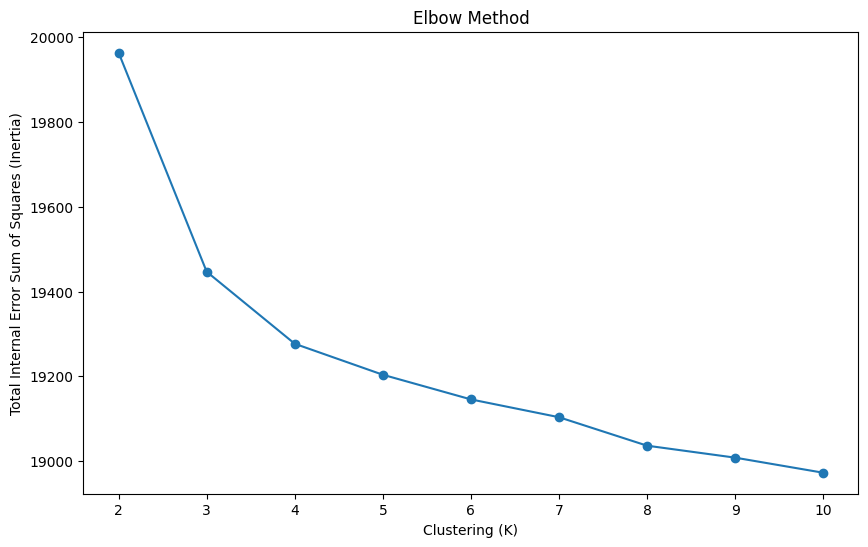

In [146]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# KMeans algoritması için nesne oluştur
kmeans = KMeans(random_state=42)

# Küme sayısı aralığı belirle
k_range = range(2, 11)
inertia = []

# Farklı küme sayıları için modeli eğit ve hata değerlerini kaydet
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    kmeans.fit(X_combined)  # X_combined, TF-IDF matrisiniz
    inertia.append(kmeans.inertia_)

# Elbow Method grafiği
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Clustering (K)')
plt.ylabel('Total Internal Error Sum of Squares (Inertia)')
plt.show()


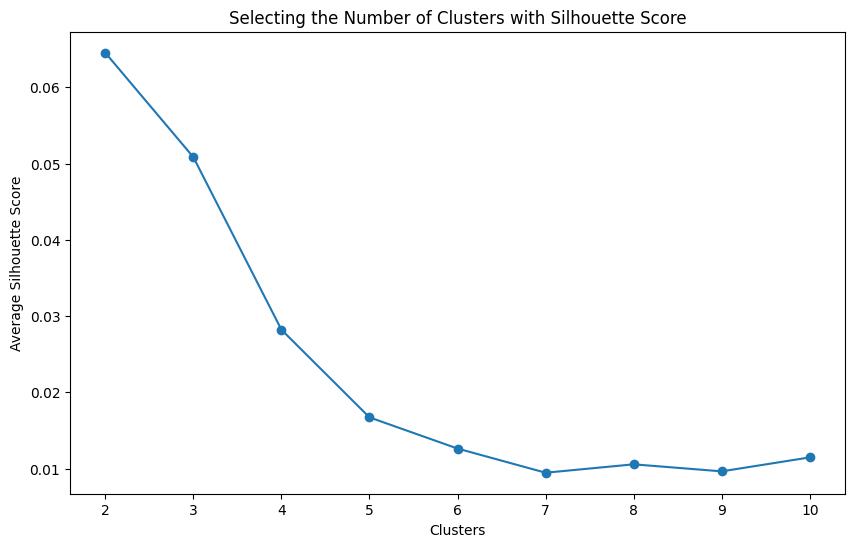

In [148]:
from sklearn.metrics import silhouette_score

# Silhouette
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    cluster_labels = kmeans.fit_predict(X_combined)
    silhouette_avg = silhouette_score(X_combined, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Silhouette graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Selecting the Number of Clusters with Silhouette Score')
plt.xlabel('Clusters')
plt.ylabel('Average Silhouette Score')
plt.show()

k=2 de en iyi sonucu aldık, cluster değeri arttıkça sonuç düştü